In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [67]:
# importing Dataset
df=pd.read_csv("churn.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [68]:
df.info()
# let check the information of our data which will show us data type of each column and missing values...
# no null values are there...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [69]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# EDA

In [70]:
# checking for null values
df.isna().sum()
# no null values are there

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [71]:
# drop object column from data
colname=df.select_dtypes("object").columns
colname

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [72]:
df=df.drop(['Surname','RowNumber','CustomerId'],axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# splitting our dataset

In [73]:
features=df.iloc[:,:-1]
target=df.iloc[:,-1]

In [74]:
features.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [75]:
target.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

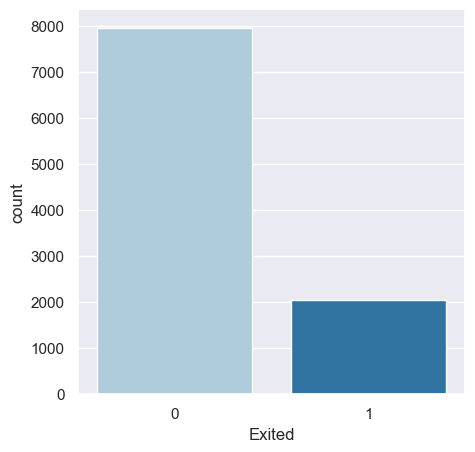

In [76]:
# countplot to show whether customer churn or not leave the bank
plt.figure(figsize=(5,5))
sns.countplot(data=df,x=target)
plt.show()

# so countplot indicates that more than 7000 people not leaving the bank wheather 2000 people are about to leave the bank

# pie plot

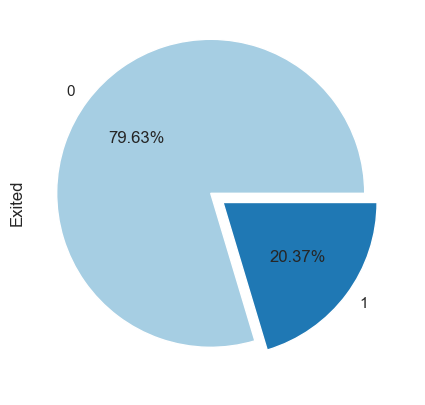

In [77]:
explode=[0.1,0]
df['Exited'].value_counts(normalize=True).plot(figsize=(5,5),kind='pie',autopct='%.2f%%',explode=explode)
plt.show()

# so here pie plot indicates that over 79.63% customers not leaving the bank wheather 20.37% customers leaving our bank

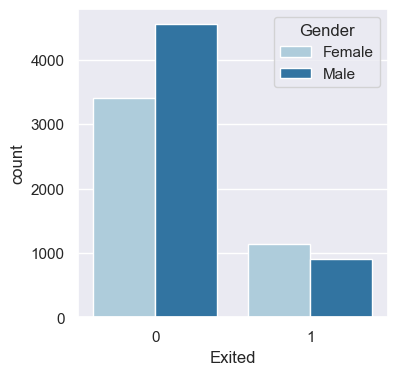

In [78]:
# countplot 
plt.figure(figsize=(4,4))
sns.countplot(data=df,x='Exited',hue='Gender')
plt.show()

In [79]:
# so we have more than 4000 male custmore who are not leaving the bank and least is female customer..
# on other hand we have more female customer as compare to male ..those are leaving our bank

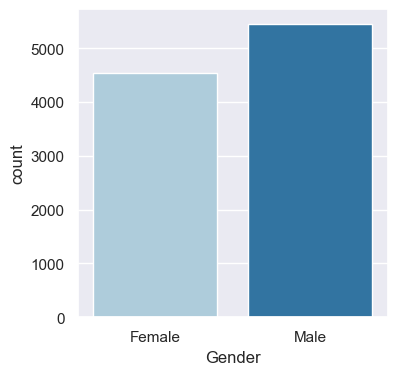

In [80]:
plt.figure(figsize=(4,4))
sns.countplot(data=df,x='Gender')
plt.show()
# so here there is majority of customers are male..

In [81]:
colname=df.select_dtypes('int64','float64').columns
colname

Index(['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited'],
      dtype='object')

CreditScore


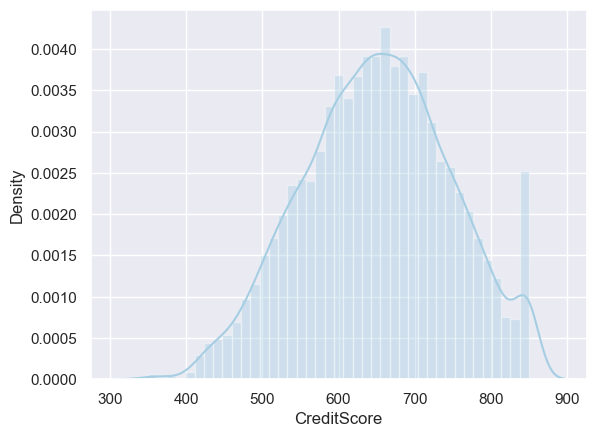

Age


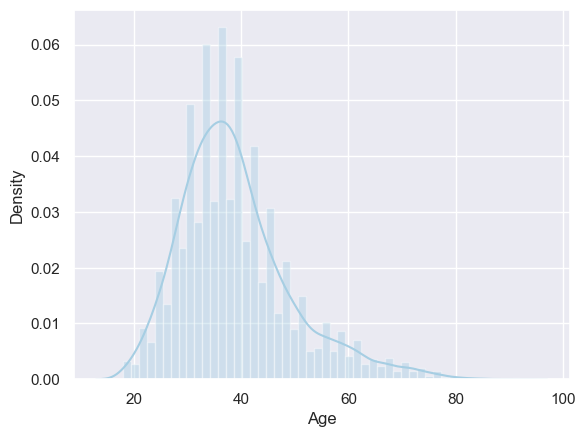

Tenure


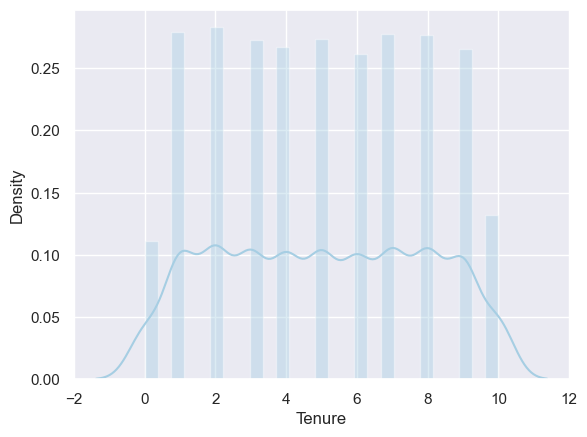

NumOfProducts


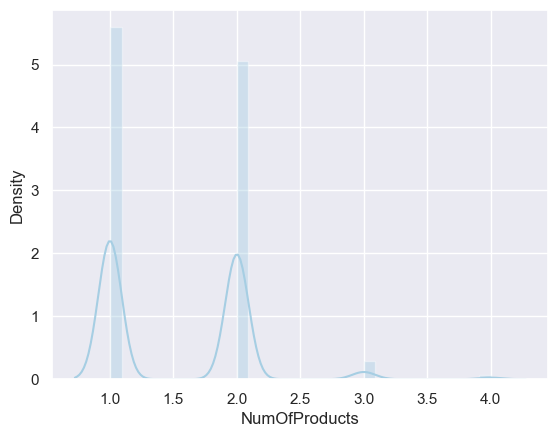

HasCrCard


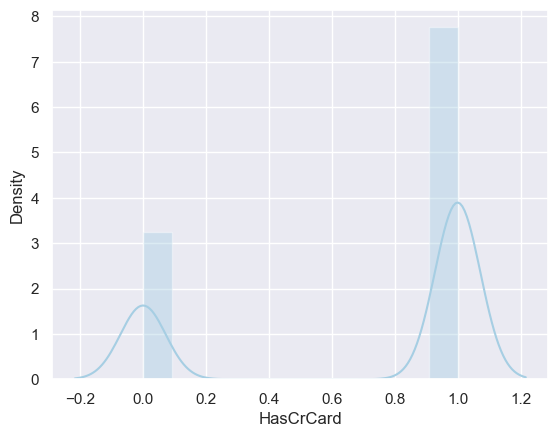

IsActiveMember


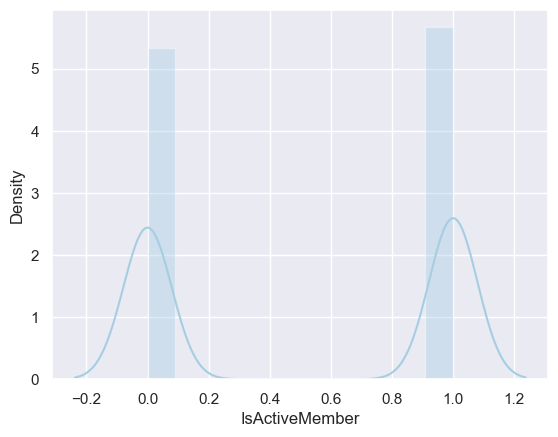

Exited


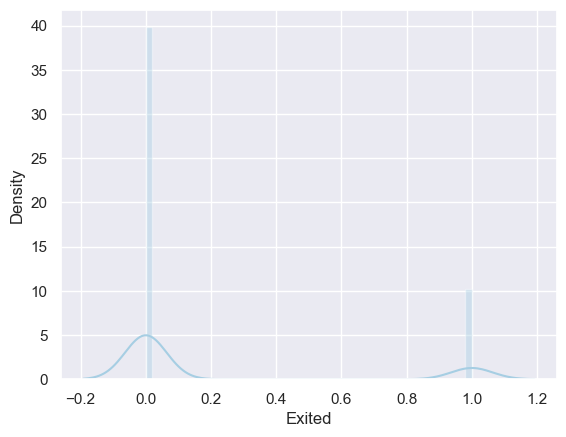

In [82]:
# checking distplot for others columns
for cols in df[colname]:
    print(cols)
    
    plt.figure()
    sns.distplot(df[cols])
    plt.show()

# Histogram plot

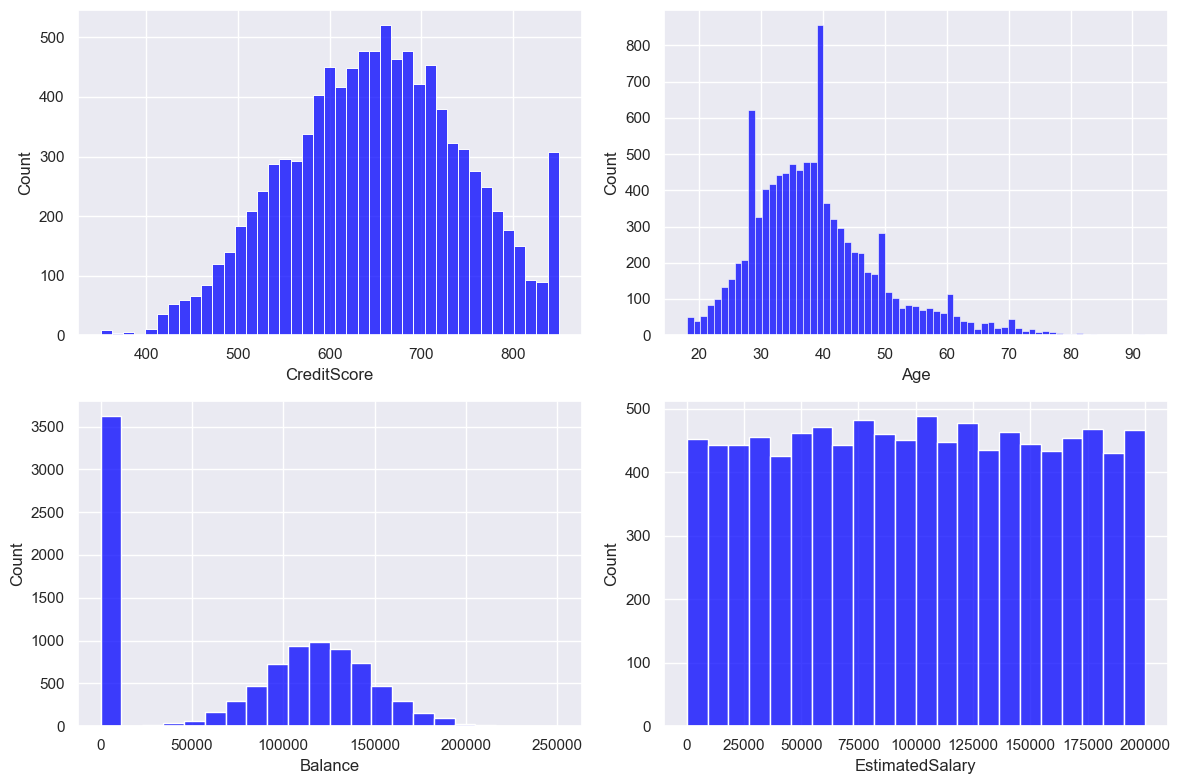

In [83]:
sns.set_theme(palette='crest_r')
plt.figure(figsize=(12,8))
plt.figure(1)
plt.subplot(2,2,1)
sns.histplot(data=df,x='CreditScore',color='Blue')

plt.subplot(2,2,2)
sns.histplot(data=df,x='Age',color='Blue')

plt.subplot(2,2,3)
sns.histplot(data=df,x='Balance',color='Blue')

plt.subplot(2,2,4)
sns.histplot(data=df,x='EstimatedSalary',color='Blue')

plt.tight_layout()
plt.show()



# countplot

<Figure size 640x480 with 0 Axes>

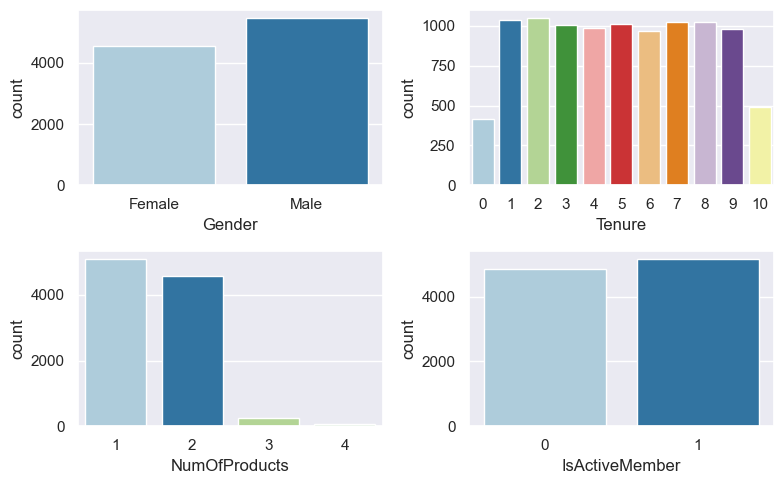

In [84]:
sns.set_theme(palette='Paired')
plt.figure(1)
plt.figure(figsize=(8,5))
plt.subplot(2,2,1)
sns.countplot(data=df,x='Gender')

plt.subplot(2,2,2)
sns.countplot(data=df,x='Tenure')

plt.subplot(2,2,3)
sns.countplot(data=df,x='NumOfProducts')

plt.subplot(2,2,4)
sns.countplot(data=df,x='IsActiveMember')


plt.tight_layout()
plt.show()

# so we have more male customers than Female
# so majority custmores having good relationship with bank ranging from 1 to 9 years
# most of customers are using 2 product of our bank
# there are same numbers of customers are active and inactive

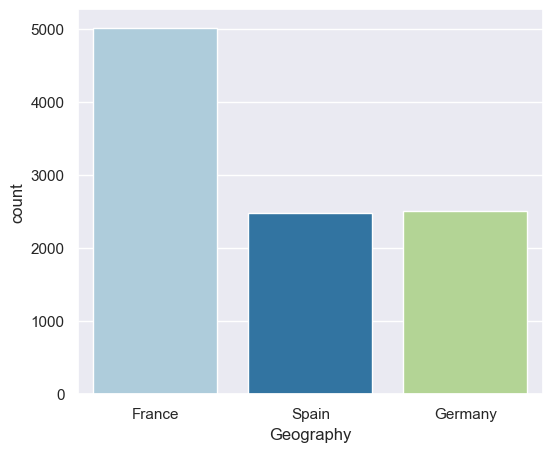

In [85]:
plt.figure(figsize=(6,5))
sns.countplot(data=df,x='Geography')
plt.show()
# we have most of the customers are from France and same numbers of customer from Spain and Germany

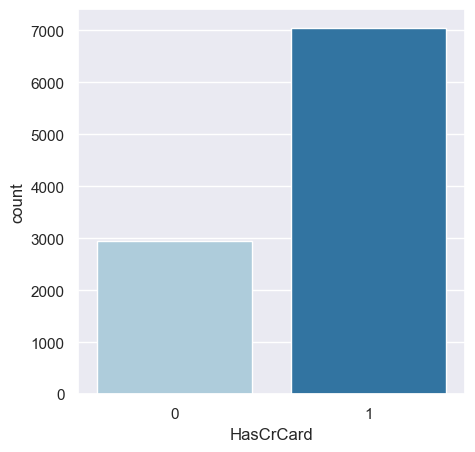

In [86]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x='HasCrCard')
plt.show()
# so here 7000 peoples are using credit card

In [87]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


# lets see the correlation between columns

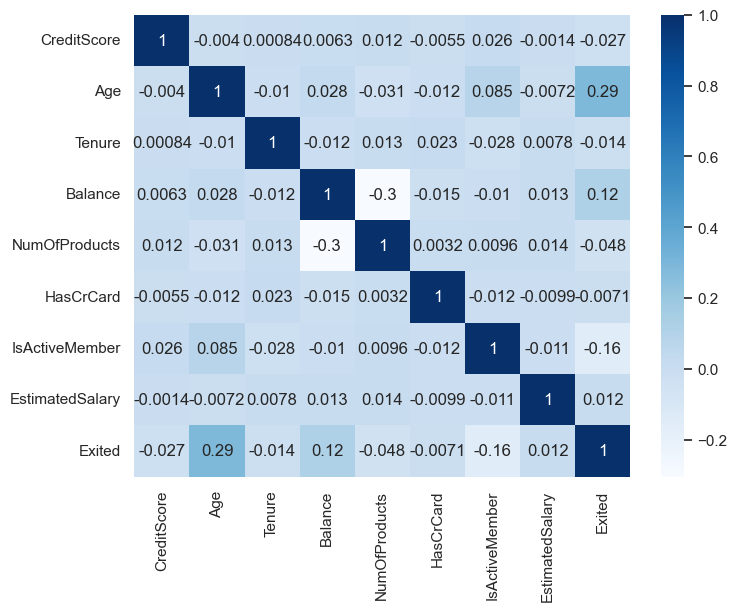

In [88]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.show()
# age shows some correlation with exited columns
# there is no correlation between independent veriaale means no multicollinerity

# lets see all continoues variable with respect to exited columns


<Figure size 640x480 with 0 Axes>

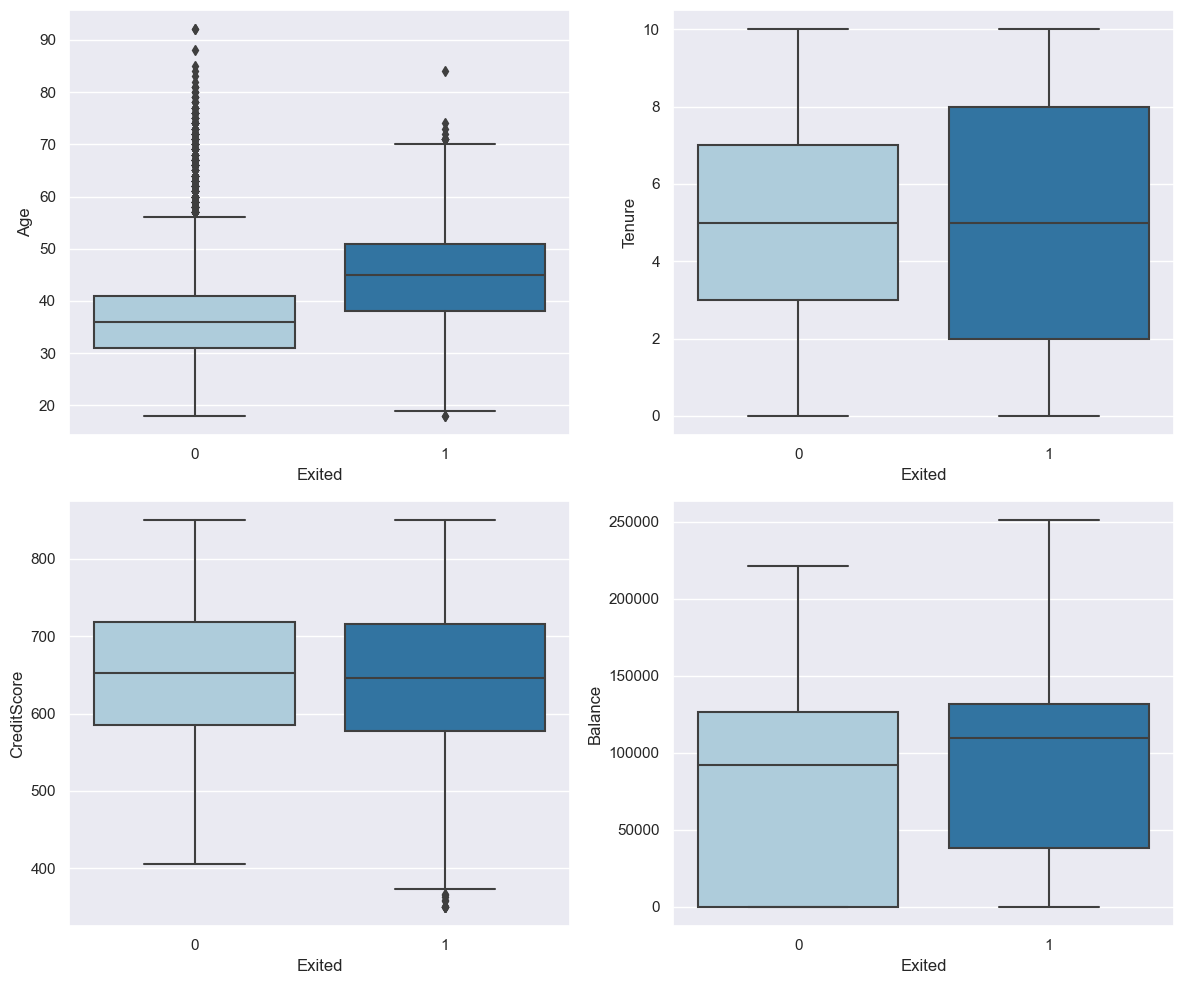

In [89]:
plt.figure(1)
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(data=df,x='Exited',y='Age')

plt.subplot(2,2,2)
sns.boxplot(data=df,x='Exited',y='Tenure')

plt.subplot(2,2,3)
sns.boxplot(data=df,x='Exited',y='CreditScore')

plt.subplot(2,2,4)
sns.boxplot(data=df,x='Exited',y='Balance')

plt.tight_layout()
plt.show()

In [90]:
# graph 1= Age shows that aged people tends to churn more as compared to younger customer
# graph 2= Tenure shows same behviour with exited status..
# graph 3=  credit score show same bevviour with exited status so credit score cant be consider as one of the factor
# graph 4= balance shows that customer with high balance churn little more

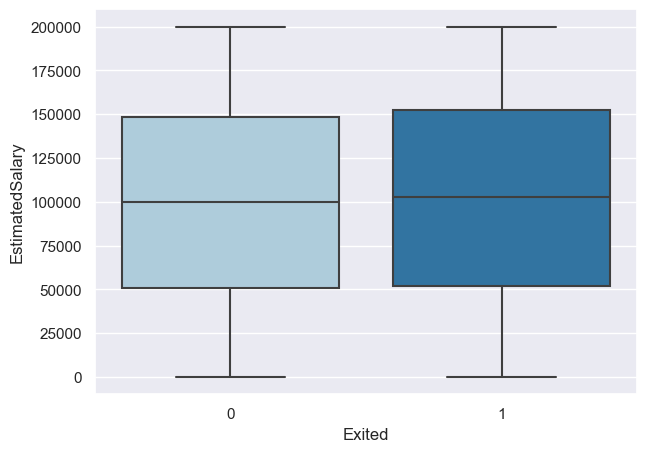

In [91]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df,x='Exited',y='EstimatedSalary')
plt.show()
# it shows same beaviour with exited status 

# to convert outlier into mean value

In [92]:
iqr=df["Age"].quantile(0.75)-df["Age"].quantile(0.25)

print(f"\nIQR  : {iqr}")
up=df["Age"].quantile(0.75) + 1.5*iqr
down=df["Age"].quantile(0.25)  -1.5*iqr

print(f"\nUpper limit :{up} and lower limit  :{down}")

sepalw=df["Age"]
outliers=[]
for i in sepalw:
    if i>up:
        print("outlier up",i)
        outliers.append(i)
        
for i in sepalw:
    if i < down:
        print("Outlieres down",i)
        outliers.append(i)


IQR  : 12.0

Upper limit :62.0 and lower limit  :14.0
outlier up 66
outlier up 75
outlier up 65
outlier up 73
outlier up 65
outlier up 72
outlier up 67
outlier up 67
outlier up 79
outlier up 80
outlier up 68
outlier up 75
outlier up 66
outlier up 66
outlier up 70
outlier up 63
outlier up 72
outlier up 64
outlier up 64
outlier up 70
outlier up 67
outlier up 82
outlier up 63
outlier up 69
outlier up 65
outlier up 69
outlier up 64
outlier up 65
outlier up 74
outlier up 67
outlier up 66
outlier up 67
outlier up 63
outlier up 70
outlier up 71
outlier up 72
outlier up 67
outlier up 74
outlier up 76
outlier up 66
outlier up 63
outlier up 66
outlier up 68
outlier up 67
outlier up 63
outlier up 71
outlier up 66
outlier up 69
outlier up 73
outlier up 65
outlier up 66
outlier up 64
outlier up 69
outlier up 64
outlier up 77
outlier up 74
outlier up 65
outlier up 70
outlier up 67
outlier up 69
outlier up 67
outlier up 74
outlier up 69
outlier up 74
outlier up 74
outlier up 64
outlier up 63
outlier

In [93]:
df["Age"]=df["Age"].replace(outliers,df["Age"].mean())


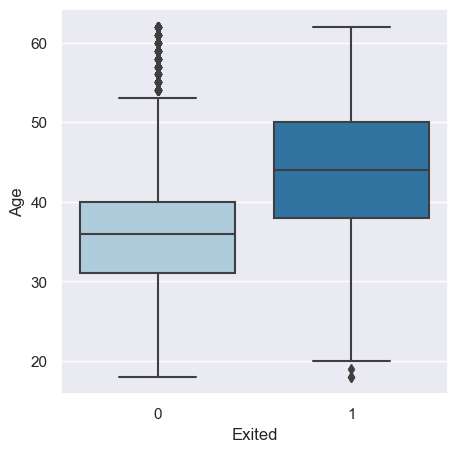

In [94]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df,x='Exited',y='Age')
plt.show()
# here some amount of outliers are remain so we have to repeat this procedure till all outlier are not convert into mean

In [95]:
iqr=df["Age"].quantile(0.75)-df["Age"].quantile(0.25)

print(f"\nIQR  : {iqr}")
up=df["Age"].quantile(0.75) + 1.5*iqr
down=df["Age"].quantile(0.25)  -1.5*iqr

print(f"\nUpper limit :{up} and lower limit  :{down}")

sepalw=df["Age"]
outliers=[]
for i in sepalw:
    if i>up:
        print("outlier up",i)
        outliers.append(i)
        
for i in sepalw:
    if i < down:
        print("Outlieres down",i)
        outliers.append(i)


IQR  : 11.0

Upper limit :59.5 and lower limit  :15.5
outlier up 61.0
outlier up 61.0
outlier up 62.0
outlier up 62.0
outlier up 61.0
outlier up 60.0
outlier up 61.0
outlier up 60.0
outlier up 62.0
outlier up 61.0
outlier up 62.0
outlier up 61.0
outlier up 62.0
outlier up 60.0
outlier up 60.0
outlier up 60.0
outlier up 60.0
outlier up 61.0
outlier up 61.0
outlier up 62.0
outlier up 62.0
outlier up 61.0
outlier up 61.0
outlier up 62.0
outlier up 62.0
outlier up 61.0
outlier up 62.0
outlier up 61.0
outlier up 60.0
outlier up 60.0
outlier up 62.0
outlier up 61.0
outlier up 61.0
outlier up 61.0
outlier up 61.0
outlier up 61.0
outlier up 62.0
outlier up 61.0
outlier up 60.0
outlier up 61.0
outlier up 61.0
outlier up 62.0
outlier up 62.0
outlier up 60.0
outlier up 61.0
outlier up 61.0
outlier up 60.0
outlier up 62.0
outlier up 60.0
outlier up 60.0
outlier up 62.0
outlier up 60.0
outlier up 60.0
outlier up 62.0
outlier up 62.0
outlier up 60.0
outlier up 62.0
outlier up 60.0
outlier up 62.0
o

In [96]:
df["Age"]=df["Age"].replace(outliers,df["Age"].mean())

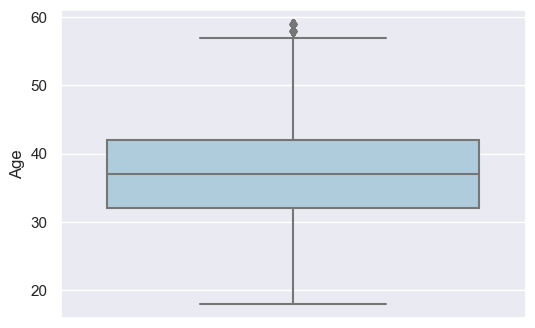

In [97]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df,y='Age')
plt.show()

# applying the classifier model

In [98]:
features.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [99]:
cols=features.select_dtypes("object").columns
cols

Index(['Geography', 'Gender'], dtype='object')

# Ordinal encoding

In [100]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
features[cols]=oe.fit_transform(features[cols])

In [101]:
features.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0.0,0.0,42,2,0.00,1,1,1,101348.88
1,608,2.0,0.0,41,1,83807.86,1,0,1,112542.58
2,502,0.0,0.0,42,8,159660.80,3,1,0,113931.57
3,699,0.0,0.0,39,1,0.00,2,0,0,93826.63
4,850,2.0,0.0,43,2,125510.82,1,1,1,79084.10


# using standard scaler to normalized our data

In [102]:
from sklearn.preprocessing import StandardScaler 
mm=StandardScaler()
features.iloc[:,:]=mm.fit_transform(features.iloc[:,:])
features.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,-0.901886,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,1.515067,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,-0.901886,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,-0.901886,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,1.515067,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276


# training and testing to our model

In [103]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.3,random_state=1)

In [104]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    
    tr=model.score(xtrain,ytrain)
    te=model.score(xtest,ytest)
    
    
    print(f"Training Accuracy :   {tr}\n Testing Accuracy :    {te}\n")
    print("Classification Report   :\n",classification_report(ytest,ypred))
    return model

In [105]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [106]:
knn=mymodel(KNeighborsClassifier())

Training Accuracy :   0.8765714285714286
 Testing Accuracy :    0.8246666666666667

Classification Report   :
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      2373
           1       0.64      0.37      0.47       627

    accuracy                           0.82      3000
   macro avg       0.74      0.66      0.68      3000
weighted avg       0.81      0.82      0.81      3000



In [107]:
lg=mymodel(LogisticRegression())

Training Accuracy :   0.8104285714285714
 Testing Accuracy :    0.8073333333333333

Classification Report   :
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      2373
           1       0.64      0.18      0.28       627

    accuracy                           0.81      3000
   macro avg       0.73      0.58      0.59      3000
weighted avg       0.78      0.81      0.76      3000



In [108]:
sv=mymodel(SVC())

Training Accuracy :   0.8644285714285714
 Testing Accuracy :    0.8576666666666667

Classification Report   :
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      2373
           1       0.84      0.39      0.53       627

    accuracy                           0.86      3000
   macro avg       0.85      0.69      0.73      3000
weighted avg       0.86      0.86      0.84      3000



In [109]:
dt=mymodel(DecisionTreeClassifier())

Training Accuracy :   1.0
 Testing Accuracy :    0.7996666666666666

Classification Report   :
               precision    recall  f1-score   support

           0       0.88      0.87      0.87      2373
           1       0.52      0.53      0.53       627

    accuracy                           0.80      3000
   macro avg       0.70      0.70      0.70      3000
weighted avg       0.80      0.80      0.80      3000



In [110]:
nb=mymodel(GaussianNB())

Training Accuracy :   0.835
 Testing Accuracy :    0.827

Classification Report   :
               precision    recall  f1-score   support

           0       0.83      0.99      0.90      2373
           1       0.82      0.22      0.35       627

    accuracy                           0.83      3000
   macro avg       0.82      0.60      0.62      3000
weighted avg       0.83      0.83      0.78      3000



In [111]:
target.value_counts()
# so here we have imbalance data ,need to do some treatment

0    7963
1    2037
Name: Exited, dtype: int64

In [112]:
parameters={
    'criterion':['gini','entropy'],
    'max_depth': list(range(1,20)),
    'min_samples_leaf':list(range(1,20))
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(DecisionTreeClassifier(), parameters, verbose=2)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 722 candidates, totalling 3610 fits
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min

[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=17; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=17; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=17; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=17; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=18; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=18; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=18; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=18; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=18; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=19; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=19; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=19; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=19; total time=   0.0s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=19; total time=   0.0s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=19; total time=   0.0s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=19; total time=   0.0s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=13, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=14, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=9; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END criterion=entropy, max_depth=1, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=2, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=3, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=19; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END .criterion=entropy, max_depth=9, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=9, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=9, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=9, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=9, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=9, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=9, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=9, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=9, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy, max_depth=9, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy, max_depth=9, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy, max_depth=9, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END criterion=entropy, max_depth=10, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=11; total time=   0.0s
[CV] END criterion

[CV] END criterion=entropy, max_depth=11, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=13; total time=   0.0s
[CV] END criteri

[CV] END criterion=entropy, max_depth=12, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=15; total time=   0.0s
[CV] END criteri

[CV] END criterion=entropy, max_depth=13, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=17; total time=   0.0s
[CV] END criteri

[CV] END criterion=entropy, max_depth=14, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=18; total time=   0.0s
[CV] END criteri

[CV] END criterion=entropy, max_depth=15, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=19; total time=   0.0s
[CV] END criteri

[CV] END criterion=entropy, max_depth=16, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=en

[CV] END criterion=entropy, max_depth=18, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, 

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

In [ ]:
grid.best_estimator_

In [ ]:
dtc=grid.best_estimator_
dtc.fit(xtrain,ytrain)
ypred=dtc.predict(xtest)
    
tr=dtc.score(xtrain,ytrain)
te=dtc.score(xtest,ytest)
    
print(f'Training ACC : {tr}\nTesting ACC : {te}')
    
print('Classification Report :\n', classification_report(ytest,ypred))
    

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros=RandomOverSampler()
X_sample,y_sample=ros.fit_resample(xtrain,ytrain)

In [ ]:
y_sample.value_counts()

In [ ]:
dt=grid.best_estimator_
dt.fit(X_sample, y_sample)
ypred=dt.predict(xtest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(n_estimators=70, max_depth=15)
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)

tr=dtc.score(xtrain,ytrain)
te=dtc.score(xtest,ytest)
    
print(f'Training ACC : {tr}\nTesting ACC : {te}')
    
print('Classification Report :\n', classification_report(ytest,ypred))
    

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report



In [ ]:
gbc=mymodel(GradientBoostingClassifier())

In [ ]:
xbgc=mymodel(XGBClassifier())

In [ ]:
abc=mymodel(AdaBoostClassifier())

In [ ]:
# conclusion

In [ ]:
#1. Adaptive boosting classifer is the best module to our data in which we got 86% accuracy...that is better than
 #other models

#2. Germany and spain have high churn percentage as compared to France so bank should focus on Germany and spain to identify what are the facilities that are present in France like number of ATM machines, number of bank branch, location of bank etc.

#3. bank should also focus on getting reliable customers because we have more than 70% of our customers whose credit score are less than 700..

#4. bank should offer more than 1 products to their customers because customers have churned less if they have more than 1 products...

#5. bank should also focus on customers who tends to churn without taking their entire balance from bank...

#6. Bank should connect more with female customers by giving them facilities for joining bank...coz we have less female customer compared to male..

